# American Options

## 1. Model Setup

I consider a fixed time horizon, $T$, divided into $N$ subperiods of length $\Delta t$:

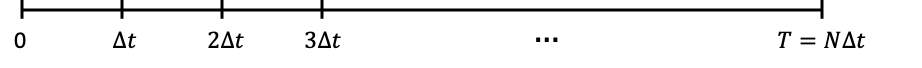

I assume that there are two assets in this economy:

1. A **risk-free asset**, $B = (B_{t_k})_{k \in \{0,1,...,N\}}$, which is a money market account where the per-period interest rate is given by a constant $r>0$. That is, the asset evolves according to:

\begin{equation}
B_t = e^{rt}
\end{equation}

2. A **risky asset**,$S = (S_{t_k})_{k \in \{0,1,...,N\}}$ (with $t_k = k\Delta t$ and $\Delta t = \frac{T}{N}$, for a fixed $N$), which evolves according to the following model:

\begin{equation}
S_{t_k} = S_{t_{k-1}}e^{r\Delta t + \sigma \sqrt{\Delta t} \epsilon_k}
\end{equation}

where $\epsilon_k$ are i.i.d. random variable with $\epsilon_k \in \{+1,-1\}$ and

\begin{equation}
\mathbb{P}(\epsilon_k = \pm1) = \frac{1}{2}\left(1 \pm \frac{(\mu-r)-\frac{1}{2}\sigma^2}{\sigma} \sqrt{\Delta t} \right)
\end{equation}

Here, $r \geq 0$ and $\sigma > 0$ are constants

Thus, the assets evolve according to a binomial tree model with multiple periods. The trees produced by the binomial model begin as follows:

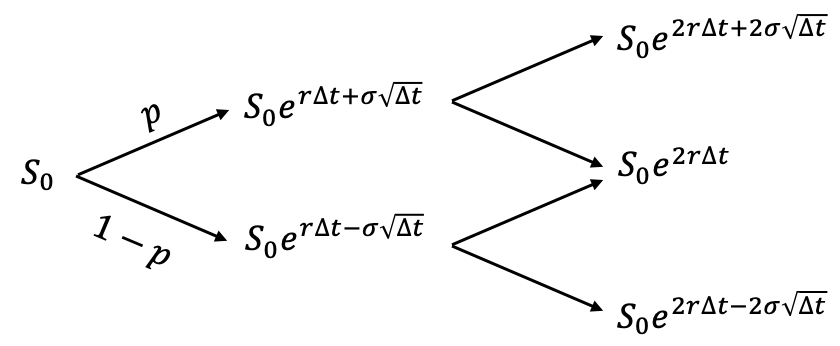

## 2. Continuous-Time Limit of this Model

### 2.1 Limiting Distribution Under $\mathbb{P}$

Let $X^{(N)}$ denote the random variable $X^{(N)}:= \log(S_T/S_0)$

\begin{aligned}
X^{(N)} 
&= \log(S_T/S_0) \\
&= \sum_{k=0}^{N-1} (r\Delta t + \sigma \sqrt{\Delta t} \epsilon_k) \\
&= rN\Delta t + \sigma \sqrt{\Delta t} \sum_{k=0}^{N-1} \epsilon_k \\
\end{aligned}

Let us derive the moment generating function of $X^{(N)}$

\begin{aligned}
\psi(u)
&= \mathbb{E}^{\mathbb{P}}\left[ e^{uX_N} \right] \\
&= \mathbb{E}^{\mathbb{P}}\left[ e^{u\log\frac{S_T}{S_0}} \right] \\
&= \mathbb{E}^{\mathbb{P}}\left[ e^{u \dot \sum_{k=0}^{N-1} (r\Delta t + \sigma \sqrt{\Delta t} \epsilon_k) } \right] \\
&= \mathbb{E}^{\mathbb{P}}\left[ \prod_{k=0}^{N-1} e^{ur\Delta t} e^{u \sigma \sqrt{\Delta t} \epsilon_k} \right]  \\
&= \prod_{k=0}^{N-1} \mathbb{E}^{\mathbb{P}}\left[ e^{ur\Delta t} e^{u \sigma \sqrt{\Delta t} \epsilon_k} \right] \text{since $\epsilon_k$ are independent} \\
&= \left(\mathbb{E}^{\mathbb{P}}\left[ e^{ur\Delta t + u\sigma \sqrt{\Delta t} \epsilon_k} \right]\right)^N \text{since $\epsilon_k$ are identical} \\
&= \left(\mathbb{E}^{\mathbb{P}}\left[ 1 + (ur\Delta t + u\sigma \sqrt{\Delta t} \epsilon_k) + \frac{1}{2} u^2 \sigma^2 \Delta t \epsilon_k^2 + \mathcal{O}(\Delta t)\right]\right)^N \text{Taylor expansion of exp(x)}\\
&= \left(1 + ur\Delta t + u\sigma \sqrt{\Delta t} \mathbb{E}^{\mathbb{P}}[\epsilon_k] + \frac{1}{2}u^2 \sigma^2 \Delta t \mathbb{E}^{\mathbb{P}}[\epsilon_k^2] + \mathcal{O}(\Delta t) \right)^N \\
\end{aligned}

Note that 
\begin{aligned}
\mathbb{E}^{\mathbb{P}}[\epsilon_k] 
&= 1 \cdot p + (-1) \cdot (1-p) \\
&= 2p-1 \\
&= \frac{(\mu-r)-\frac{1}{2}\sigma^2}{\sigma}\sqrt{\Delta t}
\end{aligned}

\begin{aligned}
\mathbb{E}^{\mathbb{P}}[\epsilon_k^2] 
&= 1^2 \cdot p + (-1)^2 \cdot (1-p) \\
&= 1
\end{aligned}

\begin{aligned}
\psi(u) 
&= \left(1+ur\Delta t + u\sigma \sqrt{\Delta t} \cdot \frac{(\mu-r)-\frac{1}{2}\sigma^2}{\sigma}\sqrt{\Delta t} + \frac{1}{2}u^2 \sigma^2 \Delta t + \mathcal{O}(\Delta t)\right)^N \\
&= \left(1 + \Delta t\left(ur+u(\mu-r-\frac{1}{2}\sigma^2)+\frac{1}{2}\mu^2\sigma^2\right) + \mathcal{O}(\Delta t)\right)^N
\end{aligned}

where I denote the middle term as $\gamma(u) = u\mu - \frac{1}{2}\mu \sigma^2 + \frac{1}{2}\mu^2\sigma^2$

Based on the result of the following limit:

\begin{equation}
\lim_{a \to 0}(1+az)^\frac{1}{a} = e^z
\end{equation}

I now have the moment generating function as:

\begin{aligned}
\psi(u) 
&= \left(1 + \gamma(u)\Delta t +  \mathcal{O}(\Delta t)\right)^N \\
&= \left(1 + \gamma(u)\frac{T}{N} + \mathcal{O}\left(\frac{T}{N}\right) \right)^N \\
&\rightarrow e^{\gamma(u)T} \text{as} N \rightarrow \infty \\
&= e^{\left(\mu-\frac{1}{2}\sigma^2\right)Tu+\frac{1}{2}\sigma^2Tu^2} \\
\end{aligned}

Taking the limit as $N$ tends to infinity I find that:

\begin{equation}
\psi(u) \xrightarrow[N \rightarrow \infty]{} e^{\gamma(u)T} = e^{\left(\mu-\frac{1}{2}\sigma^2\right)Tu+\frac{1}{2}\sigma^2Tu^2}
\end{equation}

Notice now that the expression on the RHS is the moment generating function of a normal random variable with mean $\left(\mu-\frac{1}{2}\sigma^2\right)T$ and variance $\sigma^2 T$. Since this function is continuous, I can invoke Levy's continuity theorem to conclude that $X^{(N)}$ weakly converges to this distribution as the number of subperiods tends to infinity. From this one I can conclude that the limiting distribution of the asset value is lognormal:

\begin{equation}
X^{(N)} \xrightarrow[N\rightarrow \infty]{d} \left(\mu - \frac{1}{2}\sigma^2\right)T + \sigma \sqrt{T} Z \hskip 1em \text{and} \hskip 1em Z \overset{\mathbb{P}}{\sim} \mathcal{N}(0,1) 
\end{equation}

\begin{equation}
S_T \xrightarrow[N\rightarrow \infty]{d} S_0\cdot \exp \left[ \left(\mu - \frac{1}{2}\sigma^2\right)T + \sigma \sqrt{T} Z \right]
\end{equation}

### 2.2 Limiting Distribution Under $\mathbb{Q}$

First, I can drive the risk-neutral probabilities in this model, $\mathbb{Q}(\epsilon_k = \pm 1)$. Using the bank account as the numeraire asset produces the martingale property of the relative price process, note that here $k$ referrs to $t_{k-1}$ as described above:

\begin{equation}
\mathbb{E}^{\mathbb{Q}}\left[ \frac{S_k}{B_k}|\mathcal{F}_{k-1} \right] = \frac{S_{k-1}}{B_{k-1}} 
\end{equation}

If I denote $\mathbb{Q}(\epsilon_k = 1) = q$, the above martingale property can becomes:

\begin{equation}
q\cdot \frac{S_{k-1}e^{r\Delta t+\sigma \sqrt{\Delta t}}}{B_{k-1}e^{r\Delta t}} + (1-q) \cdot \frac{S_{k-1}e^{r\Delta t-\sigma \sqrt{\Delta t}}}{B_{k-1}e^{\Delta t}} = \frac{S_{k-1}}{B_{k-1}}
\end{equation}

Then this formula gives the following risk-neutral probability:

\begin{equation}
q = \frac{1-e^{-\sigma \sqrt{\Delta t}}}{e^{\sigma \sqrt{\Delta t}}-e^{-\sigma \sqrt{\Delta t}}}
\end{equation}

Using the Taylor Expansion of $e^x$, I can write:

\begin{aligned}
\mathbb{Q}(\epsilon_k = 1) = q 
&= \frac{1-e^{-\sigma \sqrt{\Delta t}}}{e^{\sigma \sqrt{\Delta t}}-e^{-\sigma \sqrt{\Delta t}}} \\
&= \frac{1-[1+(-\sigma \sqrt{\Delta t}) + \frac{1}{2}\sigma^2\Delta t] + \mathcal{O}(\Delta t^{3/2})}{(1+\sigma \sqrt{\Delta t} + \frac{1}{2}\sigma^2\Delta t) + \mathcal{O}(\Delta t^{3/2}) - [1+(-\sigma \sqrt{\Delta t}) + \frac{1}{2}\sigma^2\Delta t] - \mathcal{O}(\Delta t^{3/2})} \\
&= \frac{\sigma \sqrt{\Delta t} - \frac{1}{2}\sigma^2\Delta t + \mathcal{O}(\Delta t^{3/2})}{2 \sigma \sqrt{\Delta t} + \mathcal{O}(\Delta t^{3/2})} \\
&= \frac{1}{2} - \frac{1}{4}\sigma \sqrt{\Delta t} + \mathcal{O}(\Delta t)
\end{aligned}

\begin{aligned}
\mathbb{Q}(\epsilon_k = -1) = 1-q = \frac{1}{2} + \frac{1}{4}\sigma \sqrt{\Delta t} + \mathcal{O}(\Delta t)
\end{aligned}

If I repeat the same steps as in the previous section using $q$ instead of $p$, I can derive the limiting distribution of $S_T$ under $\mathbb{Q}$ is:

\begin{equation}
S_T \xrightarrow[N\rightarrow \infty]{d} S_0\cdot \exp \left[ \left(r - \frac{1}{2}\sigma^2\right)T + \sigma \sqrt{T} Z^{\mathbb{Q}} \right]  \hskip 1em \text{and} \hskip 1em Z^{\mathbb{Q}} \overset{\mathbb{Q}}{\sim} \mathcal{N}(0,1) 
\end{equation}

Note that this expression is itentical to the physical probability measure limiting distribution, but with $\mu$ being replaced by the risk-free rate $r$.

### 2.3 Limiting Distribution Under $\mathbb{Q}^S$

The analysis in the above two sections can be repeated with the risky asset as the numeraire to derive an analogous result involving the limiting distribution of $A_T$ under $\mathbb{Q}^S$.

When using $S$ as the numeraire, the probability is equal to:
\begin{aligned}
Q^{S}(\epsilon_k = 1) = q^S 
&= \frac{1-e^{\sigma \sqrt{\Delta t}}}{e^{-\sigma \sqrt{\Delta t}}-e^{\sigma \sqrt{\Delta t}}}\\
&= \frac{1}{2} + \frac{1}{4}\sigma \sqrt{\Delta t} + \mathcal{O}(\Delta t)
\end{aligned}

\begin{aligned}
\mathbb{Q}(\epsilon_k = -1) = 1-q^S = \frac{1}{2} - \frac{1}{4}\sigma \sqrt{\Delta t} + \mathcal{O}(\Delta t)
\end{aligned}

WIth the probability of $q^S$, I arrive the result that the asset value $S_T$ converges in distribution:

\begin{equation}
S_T \xrightarrow[N\rightarrow \infty]{d} S_0\cdot \exp \left[ \left(r + \frac{1}{2}\sigma^2\right)T + \sigma \sqrt{T} Z^S \right]  \hskip 1em \text{and} \hskip 1em Z^S \overset{\mathbb{Q}^S}{\sim} \mathcal{N}(0,1) 
\end{equation}

## 3. American Put Option Evaluation

In this section, I evaluate an American put option. Assume that $T=1$, $S_0=10$, $\mu=5\%$, $\sigma=20\%$, and the risk-free rate $r=2\%$. Use $N=5000$, which means the time step amount is 5000.

### 3.1 American Put Option Price Calculation

Import packages required

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Base parameters input

In [2]:
K = 10      # strike price
T = 1       # Time to expiration of the option
r = 0.02    # risk-free rate
mu = 0.05   # drift rate
sigma = 0.2 # volatility
N = 5000    # the number of discrete time values
S0 = 10     # starting stock price  

Based on the parameters, calculate the move increment in the binomial tree under the $\mathbb{Q}$ measure.

The movement calculation is based on the provided price stochastic process:
\begin{align}
S_{t_k} = S_{t_{k-1}}\,e^{r\Delta t + \sigma \sqrt{\Delta t} \epsilon_k}
\end{align}

Based on the provided the $P$ measure:
\begin{align*}
P(\epsilon_k = \pm 1 ) &= \tfrac{1}{2}\left(1 \pm \frac{(\mu-r)-\tfrac{1}{2}\sigma^2}{\sigma} \sqrt{\Delta t} \right).
\end{align*}

I derived the $\mathbb{Q}$ measure, which is the martingale measure induced by using the bank account $B$ as a numeraire:
\begin{align*}
q & = \frac{1- e^{-\sigma \sqrt{\Delta t}}}{e^{\sigma \sqrt{\Delta t}} - e^{-\sigma \sqrt{\Delta t}}}
\end{align*}

In [3]:
# delta of time step
t = np.linspace(0,T,N)
dt = t[1] - t[0]
sqrt_dt = np.sqrt(dt)
# up move increment
u = np.exp(r*dt+sigma*sqrt_dt)
# down move increment
d = np.exp(r*dt-sigma*sqrt_dt)
# probability of up move 
qu = (1-np.exp(-sigma*sqrt_dt))/(np.exp(sigma*sqrt_dt)-np.exp(-sigma*sqrt_dt))
# probabiliy of down move
qd = 1 - qu

Calculate the Stock Binomial Tree

In [4]:
# stock binomial tree
StockTree = np.zeros((N+1,N+1))
for j in range(N+1):
    for i in range(j+1):
        StockTree[i][j] = S0*(u**(j-i))*(d**(i))

In [5]:
# this is to convert the stock binomial tree to a dataframe for easy display purpose
StockTree_df = pd.DataFrame(StockTree)
StockTree_df

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,10.0,10.028367,10.056815,10.085343,10.113953,10.142643,10.171415,10.200269,10.229204,10.258222,...,1.380643e+07,1.384559e+07,1.388487e+07,1.392426e+07,1.396375e+07,1.400337e+07,1.404309e+07,1.408293e+07,1.412288e+07,1.416294e+07
1,0.0,9.971793,10.000080,10.028448,10.056895,10.085424,10.114034,10.142724,10.171497,10.200350,...,1.372854e+07,1.376748e+07,1.380654e+07,1.384570e+07,1.388498e+07,1.392437e+07,1.396387e+07,1.400348e+07,1.404320e+07,1.408304e+07
2,0.0,0.000000,9.943665,9.971873,10.000160,10.028528,10.056976,10.085505,10.114115,10.142806,...,1.365109e+07,1.368981e+07,1.372865e+07,1.376759e+07,1.380665e+07,1.384581e+07,1.388509e+07,1.392448e+07,1.396398e+07,1.400359e+07
3,0.0,0.000000,0.000000,9.915617,9.943745,9.971952,10.000240,10.028608,10.057056,10.085586,...,1.357408e+07,1.361258e+07,1.365120e+07,1.368992e+07,1.372876e+07,1.376770e+07,1.380676e+07,1.384592e+07,1.388520e+07,1.392459e+07
4,0.0,0.000000,0.000000,0.000000,9.887648,9.915696,9.943824,9.972032,10.000320,10.028688,...,1.349750e+07,1.353579e+07,1.357419e+07,1.361269e+07,1.365131e+07,1.369003e+07,1.372887e+07,1.376781e+07,1.380687e+07,1.384603e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.432397e-06,7.453481e-06,7.474624e-06,7.495828e-06,7.517091e-06
4997,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.411432e-06,7.432457e-06,7.453540e-06,7.474684e-06
4998,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.390527e-06,7.411492e-06,7.432516e-06
4999,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.369680e-06,7.390586e-06


Calculate the Put Option payoff binomial tree, which is  $\max(K-S,0)$

In [6]:
# American put option payoff binomial tree
PayoffTree = np.zeros((N+1,N+1))
for j in range(N+1):
    for i in range(j+1):
        PayoffTree[i][j] = np.maximum(0, K-StockTree[i][j])

In [7]:
# this is to convert the put option pay off binomial tree to a dataframe for easy display purpose
PayoffTree_df = pd.DataFrame(PayoffTree)
PayoffTree_df

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.028207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.056335,0.028127,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.084383,0.056255,0.028048,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,0.112352,0.084304,0.056176,0.027968,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.999993,9.999993,9.999993,9.999993,9.999992
4997,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,9.999993,9.999993,9.999993,9.999993
4998,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,9.999993,9.999993,9.999993
4999,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,9.999993,9.999993


Calculate the American Option payoff binomial Tree, considering the capability to early exercise the put option, whenever the immediate exercise payoff is larger than the discounted expectation of the next step's payoff, the previous payoff tree will be updated with the larger value. Basically, American option payoff = max(exercise value, continuation value)

In [8]:
# discount the payoff tree backwards considering the early exercise option
from collections import defaultdict
node_index = defaultdict(list) # create a dictionary with list as values to store the cell's index where early exercise is optimal
for j in range(N-1,-1,-1):
    for i in range(j+1):
        # calculate the continuation value
        PayoffTree[i][j] = (qu*PayoffTree[i][j+1]+qd*PayoffTree[i+1][j+1])*np.exp(-r*dt)
        # check whether the exercise value is larger than the continuation value
        if (K-StockTree[i][j]) >= PayoffTree[i][j]:
            # if exercise value is larger, count this node as part of the stoping region, key is the time step, value is the node location
            node_index[j].append(i)
            # replace the payoff tree with the larger exercise value and calculate back forward along the time steps
            PayoffTree[i][j] = K - StockTree[i][j]

In [9]:
# this is to convert the put option pay off binomial tree to a dataframe for easy display purpose
PayoffTree_df = pd.DataFrame(PayoffTree)
PayoffTree_df

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,0.711183,0.698844,0.686637,0.674562,0.662618,0.650806,0.639126,0.627579,0.616164,0.604882,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.723493,0.711023,0.698684,0.686477,0.674402,0.662458,0.650646,0.638967,0.627420,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.735933,0.723332,0.710863,0.698524,0.686317,0.674241,0.662298,0.650487,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.748504,0.735773,0.723172,0.710702,0.698364,0.686157,0.674081,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.761205,0.748344,0.735612,0.723011,0.710542,0.698203,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,9.999993,9.999993,9.999993,9.999993,9.999992
4997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,9.999993,9.999993,9.999993,9.999993
4998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,9.999993,9.999993,9.999993
4999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,9.999993,9.999993


The price of this American put option is actually the first node of the payoff binomial tree

In [10]:
# American put option price
optionprice = PayoffTree[0][0]
print("This American Put Option's price is:", round(optionprice,2))

This American Put Option's price is: 0.71


### 3.2 Exercise Boundary

Plot the exercise boundary as a function of $t$， considering the fact that the American put option has a strike $K=10$

The following code is trying to find the uppermost stopping region node which could be regarded as the boundary to separate the continuation region and the stopping region.

In [11]:
# column_index refers to the time step k
for column_index in node_index.keys():
    # find the row index of the uppermost node in the stopping region
    row_index = min(node_index[column_index])
    # keep the row index as the new value for each time step key
    node_index[column_index] = row_index

In [12]:
# S is the stock price at the uppermost stopping region node
# tau is the time index of the exercise region
S = []
tau = []
for column_index, row_index in node_index.items():
    S.append(StockTree[row_index][column_index])
    tau.append(t[column_index])

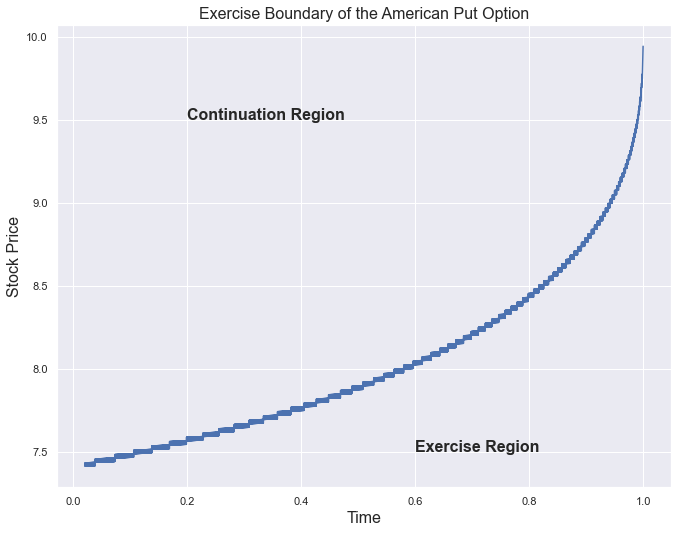

In [13]:
# plot the exercise boundary
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
ax = sns.lineplot(x=tau,y=S)
ax.set_xlabel("Time", fontsize=16);
ax.set_ylabel("Stock Price", fontsize=16);
ax.set_title("Exercise Boundary of the American Put Option", fontsize=16);
ax.annotate("Continuation Region", xy=(0.2,9.5), weight='semibold',fontsize=16);
ax.annotate("Exercise Region", xy=(0.6,7.5), weight='semibold',fontsize=16);

### 3.3 Exercise Boundary with Varying Volatility and Risk-Free Rate

Show how the various plots vary as volatility and risk-free rate change.

Define a function to quickly plot the exercise boundary with different risk free rate and volatility rate.

In [15]:
def exercise_boundary_amer_put(S0,T,mu,sigma,r,N):
    
    # delta of time step
    t = np.linspace(0,T,N)
    dt = t[1] - t[0]
    sqrt_dt = np.sqrt(dt)
    # up move increment
    u = np.exp(r*dt+sigma*sqrt_dt)
    # down move increment
    d = np.exp(r*dt-sigma*sqrt_dt)
    # probability of up move 
    qu = (1-np.exp(-sigma*sqrt_dt))/(np.exp(sigma*sqrt_dt)-np.exp(-sigma*sqrt_dt))
    # probabiliy of down move
    qd = 1 - qu

    # stock binomial tree
    StockTree = np.zeros((N+1,N+1))
    for j in range(N+1):
        for i in range(j+1):
            StockTree[i][j] = S0*(u**(j-i))*(d**(i))

    # American put option payoff binomial tree
    PayoffTree = np.zeros((N+1,N+1))
    for j in range(N+1):
        for i in range(j+1):
            PayoffTree[i][j] = np.maximum(0, K-StockTree[i][j])

    # discount the payoff tree backwards considering the early exercise option
    from collections import defaultdict
    # node_index dictionary to store the index of exercise region along the binomial tree
    # key value is the column index, value is the list of row index
    node_index = defaultdict(list)
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            PayoffTree[i][j] = (qu*PayoffTree[i][j+1]+qd*PayoffTree[i+1][j+1])*np.exp(-r*dt)
            if (K-StockTree[i][j]) >= PayoffTree[i][j]:
                node_index[j].append(i)
                PayoffTree[i][j] = K - StockTree[i][j]

    # find the upper most blue (exercise) region index at each time step
    for column_index in node_index.keys():
        row_index = min(node_index[column_index])
        node_index[column_index] = row_index

    # store the stock price and time in a list
    S = []
    tau = []
    for column_index, row_index in node_index.items():
        S.append(StockTree[row_index][column_index])
        tau.append(t[column_index])

    return S, tau

Try to investigate the effect of **volatility** on the exercise boundary

In [16]:
# try volatility = 10%

K = 10      # strike price
T = 1       # Time to expiration of the option
r = 0.02    # risk-free rate
mu = 0.05   # drift rate
sigma = 0.1 # volatility
N = 5000    # the number of discrete time values
S0 = 10     # starting stock price  

S1, tau1 = exercise_boundary_amer_put(S0,T,mu,sigma,r,N)

In [17]:
# try volatility = 15%

K = 10      # strike price
T = 1       # Time to expiration of the option
r = 0.02    # risk-free rate
mu = 0.05   # drift rate
sigma = 0.15 # volatility
N = 5000    # the number of discrete time values
S0 = 10     # starting stock price  

S2, tau2 = exercise_boundary_amer_put(S0,T,mu,sigma,r,N)

In [18]:
# try volatility = 25%

K = 10      # strike price
T = 1       # Time to expiration of the option
r = 0.02    # risk-free rate
mu = 0.05   # drift rate
sigma = 0.25 # volatility
N = 5000    # the number of discrete time values
S0 = 10     # starting stock price  

S3, tau3 = exercise_boundary_amer_put(S0,T,mu,sigma,r,N)

In [19]:
# try volatility = 30%

K = 10      # strike price
T = 1       # Time to expiration of the option
r = 0.02    # risk-free rate
mu = 0.05   # drift rate
sigma = 0.3 # volatility
N = 5000    # the number of discrete time values
S0 = 10     # starting stock price  

S4, tau4 = exercise_boundary_amer_put(S0,T,mu,sigma,r,N)

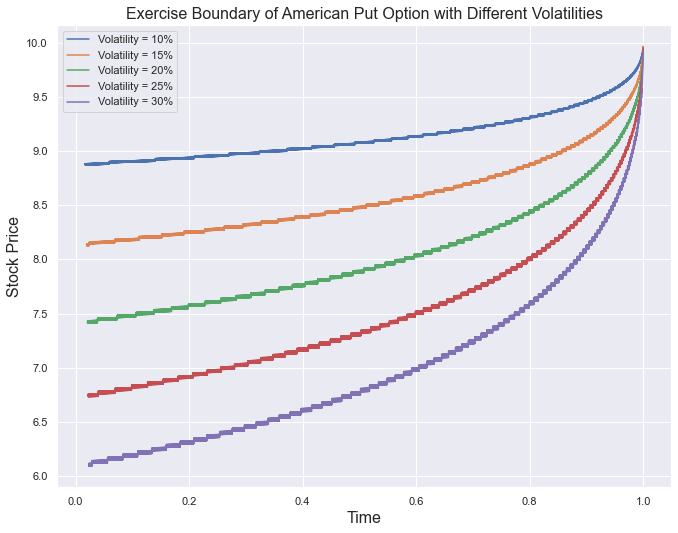

In [20]:
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
ax = sns.lineplot(x=tau1,y=S1,label='Volatility = 10%') # volatility = 10%
ax = sns.lineplot(x=tau2,y=S2,label="Volatility = 15%") # volatility = 15%
ax = sns.lineplot(x=tau,y=S, label='Volatility = 20%')  # volatility = 20% (the base parameters)
ax = sns.lineplot(x=tau3,y=S3,label="Volatility = 25%") # volatility = 25%
ax = sns.lineplot(x=tau4,y=S4,label="Volatility = 30%") # volatility = 30%
ax.set_xlabel("Time", fontsize=16);
ax.set_ylabel("Stock Price", fontsize=16);
ax.set_title("Exercise Boundary of American Put Option with Different Volatilities", fontsize=16);

It can be seen that the exercise boundary shifts downward when volatility increases. When volatility increases, the American put option is more valuable and more likely to be in-the-money at maturity, so rational investor would not immediately exercise the put option unless the American put option is deep in-the-money. 

Try to investigate the effect of **the risk free rate** on the exercise boundary

In [21]:
# try risk free rate = 1%

K = 10      # strike price
T = 1       # Time to expiration of the option
r = 0.01    # risk-free rate
mu = 0.05   # drift rate
sigma = 0.2 # volatility
N = 5000    # the number of discrete time values
S0 = 10     # starting stock price  

S5, tau5 = exercise_boundary_amer_put(S0,T,mu,sigma,r,N)

In [22]:
# try risk free rate = 3%

K = 10      # strike price
T = 1       # Time to expiration of the option
r = 0.03    # risk-free rate
mu = 0.05   # drift rate
sigma = 0.2 # volatility
N = 5000    # the number of discrete time values
S0 = 10     # starting stock price  

S6, tau6 = exercise_boundary_amer_put(S0,T,mu,sigma,r,N)

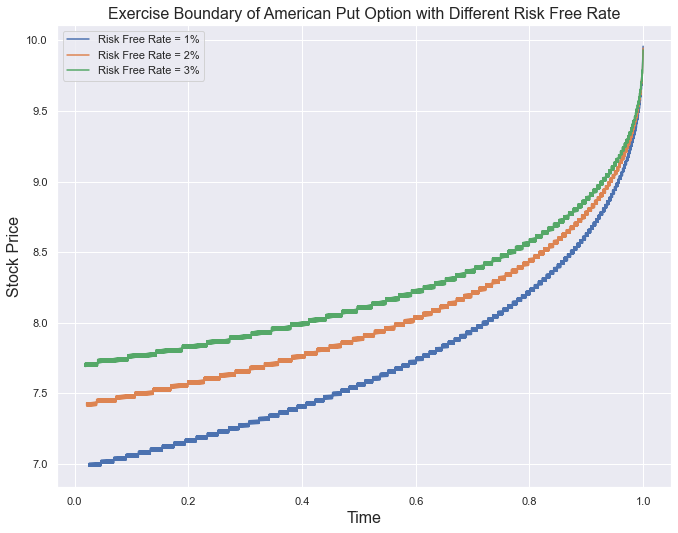

In [23]:
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
ax = sns.lineplot(x=tau5,y=S5,label='Risk Free Rate = 1%') # risk free rate = 1%
ax = sns.lineplot(x=tau,y=S, label='Risk Free Rate = 2%')  # risk free rate = 2% (the base parameters)
ax = sns.lineplot(x=tau6,y=S6,label="Risk Free Rate = 3%") # risk free rate = 3%
ax.set_xlabel("Time", fontsize=16);
ax.set_ylabel("Stock Price", fontsize=16);
ax.set_title("Exercise Boundary of American Put Option with Different Risk Free Rate", fontsize=16);

It can be seen that the exercise boundary shifts upward as risk free rate increases. When the risk free rate increases, the American put option is less valuable. Depositing the mony in the bank and earning the risk free rate is more attractive, so investors are more likely to immediately exercise the put option early instead of holding the option until maturity.

### 3.4 Financial Analysis of Long American Put Option

Simulate 10,000 sample paths of the asset price

In [24]:
K = 10          # strike price
T = 1           # Time to expiration of the option
r = 0.02        # risk-free rate
mu = 0.05       # drift rate
sigma = 0.2     # volatility
N = 5000        # the number of discrete time values
S0 = 10         # starting stock price  
Nsims = 10_000  # number of simulation paths

def SimPrice(T,r,mu,sigma,N,S0,Nsims):

    # initialize the starting stock price in the simulation matrix
    S = np.zeros((Nsims,N))
    S[:,0] = S0

    # compute time step size
    t = np.linspace(0,T,N)
    dt = t[1] - t[0]
    sqrt_dt = np.sqrt(dt) 

    # compute the physical up probabilities
    p = 0.5*(1+((mu-r-0.5*sigma**2)/sigma)*sqrt_dt)

    for i in range(N-1):
        U = np.random.rand(Nsims) # this is random value between 0 and 1
        up = (U<p) # this is 1 with probability p, this is 0 with probability 1-p
        x = 2*up - 1 # this is 1 with probability p, this is -1 with probability 1-p

        S[:,i+1] = S[:,i]*np.exp(r*dt+sigma*sqrt_dt*x)
  
    # return the simulation stock matrix
    return S

S_simulation = SimPrice(T,r,mu,sigma,N,S0,Nsims)

First, I need to figure out the exercise time for each simulation path

In [25]:
# S is the exercise boundary's stock price given base parameters
# tau is the exercise boundary's time index value given base parameters
# exercise_time is the vector to store the exercise time for each simulated asset price path

exercise_time = np.zeros(Nsims)

for j in range(Nsims):
    for i in range(len(tau)):
        time_step = int(tau[i]/dt)
        # check whether the simulated stock price hit into the stopping region
        if S_simulation[j,time_step] <= S[i]:
            exercise_time[j] = time_step

If the value within the exercise_time vector is 0, that means there is no early exercise time available, the investor needs to hold the option until the maturity. That said, the investor will not exercise this option at all and these points need to be removed for the kde estimate. Thus, I create another vector to store all these early exercise time.

In [26]:
exercise_time.shape

(10000,)

In [27]:
early_exercise_time = exercise_time[exercise_time!=0.]*dt
early_exercise_time.shape

(4381,)

In [28]:
# reshape the early_exercise_time array for the following kde estimation purpose
early_exercise_time = early_exercise_time.reshape((early_exercise_time.shape[0],1))
early_exercise_time.shape

(4381, 1)

#### 3.4.1 Exercise Time Kernel Density Estimate

To obtain a kernel density estimate, I used the kernel density estimator with scikit-learn package. This pacakage provides 6 available kernels for estimation purpose. I tried all of them and decided to stay with the Gaussian kernel for next steps.

In [29]:
from sklearn.neighbors import KernelDensity
# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(early_exercise_time)
log_dens1 = kde.score_samples(early_exercise_time)
# epanechnikov KDE
kde = KernelDensity(kernel='epanechnikov', bandwidth=0.5).fit(early_exercise_time)
log_dens2 = kde.score_samples(early_exercise_time)
# exponential KDE
kde = KernelDensity(kernel='exponential', bandwidth=0.5).fit(early_exercise_time)
log_dens3 = kde.score_samples(early_exercise_time)
# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.5).fit(early_exercise_time)
log_dens4 = kde.score_samples(early_exercise_time)
# linear KDE
kde = KernelDensity(kernel='linear', bandwidth=0.5).fit(early_exercise_time)
log_dens5 = kde.score_samples(early_exercise_time)
# cosine kernel
kde = KernelDensity(kernel='cosine', bandwidth=0.5).fit(early_exercise_time)
log_dens6 = kde.score_samples(early_exercise_time)

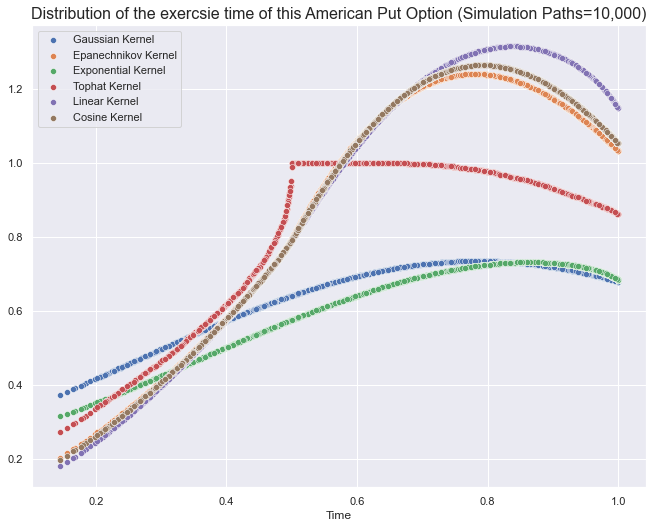

In [30]:
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
sns.scatterplot(early_exercise_time[:,0], np.exp(log_dens1),label='Gaussian Kernel');
sns.scatterplot(early_exercise_time[:,0], np.exp(log_dens2),label='Epanechnikov Kernel');
sns.scatterplot(early_exercise_time[:,0], np.exp(log_dens3),label='Exponential Kernel');
sns.scatterplot(early_exercise_time[:,0], np.exp(log_dens4),label='Tophat Kernel');
sns.scatterplot(early_exercise_time[:,0], np.exp(log_dens5),label='Linear Kernel');
sns.scatterplot(early_exercise_time[:,0], np.exp(log_dens6),label='Cosine Kernel');
ax.set_xlabel("Time")
ax.set_title("Distribution of the exercsie time of this American Put Option (Simulation Paths=10,000)", fontsize=16);

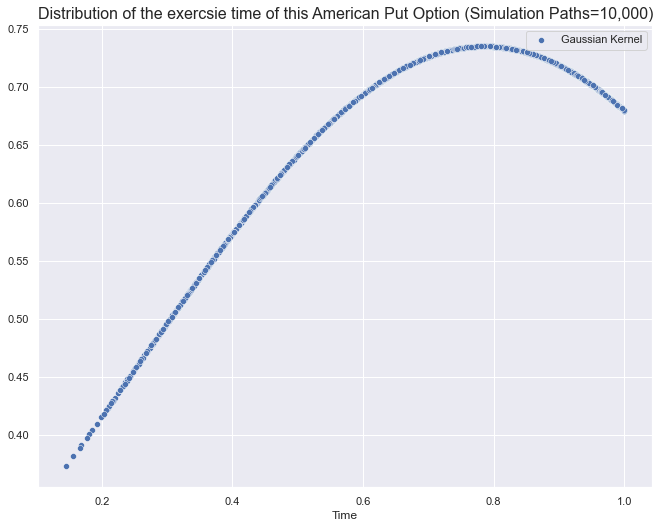

In [31]:
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
sns.scatterplot(early_exercise_time[:,0], np.exp(log_dens1),label='Gaussian Kernel');
ax.set_xlabel("Time")
ax.set_title("Distribution of the exercsie time of this American Put Option (Simulation Paths=10,000)", fontsize=16);

To check whether the exercise time extracted using the above code was correct, I inspected on one simulation path

Exercsie time extracted from the above code is:  0.0


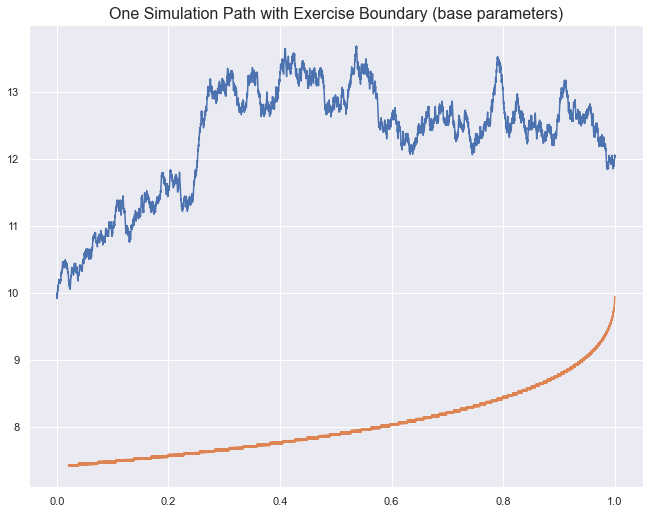

In [32]:
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
sns.lineplot(x=t,y=S_simulation[5,:]);
sns.lineplot(x=tau,y=S);
ax.set_title("One Simulation Path with Exercise Boundary (base parameters)", fontsize=16);
print("Exercsie time extracted from the above code is: ",round(exercise_time[5]*dt,2))

#### 3.4.2 P&L Kernel Density Estimate

PnL = Option Payoff - Option Price

If the asset price hit the exercise boundary, the Option will be exercised, otherwise the Option will be continued until the maturity to exercise, this scenario has been excluded for the kernel density estimate.

In [33]:
# PnL is a vector storing the PnL of this put option
PnL = np.zeros(Nsims)

for j in range(Nsims):
    if exercise_time[j] != 0.:
        exercise_time_step = int(exercise_time[j])
        PnL[j] = np.max((K-S_simulation[j,exercise_time_step]),0)-optionprice

In [34]:
PnL.shape

(10000,)

If the PnL's value is 0, that means the corresponding price path did not hit the exercise boundary and I excluded this scenario for the following kde estimate.

In [35]:
# AMR_Put_PnL stores all the early exercise PnL
AMR_Put_PnL = PnL[PnL!=0]
AMR_Put_PnL = AMR_Put_PnL.reshape((AMR_Put_PnL.shape[0],1))
AMR_Put_PnL.shape

(4381, 1)

In [36]:
from sklearn.neighbors import KernelDensity
# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(AMR_Put_PnL)
log_dens7 = kde.score_samples(AMR_Put_PnL)

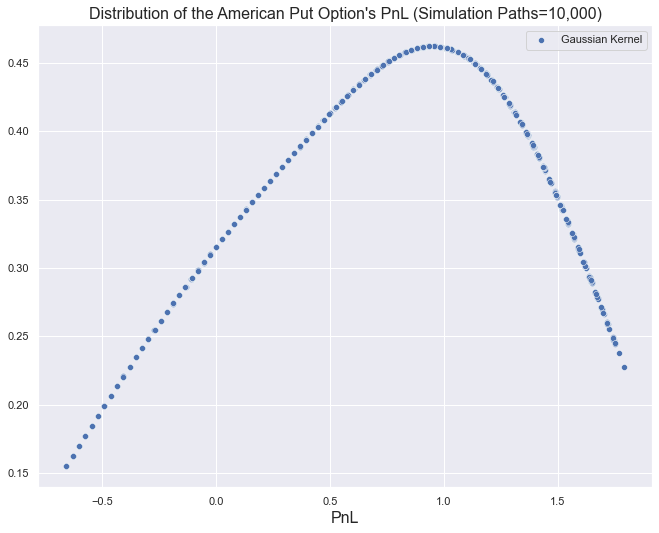

In [37]:
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
sns.scatterplot(AMR_Put_PnL[:,0], np.exp(log_dens7),label='Gaussian Kernel');
ax.set_xlabel("PnL",fontsize=16)
ax.set_title("Distribution of the American Put Option's PnL (Simulation Paths=10,000)", fontsize=16);

#### 3.4.3 Parameters Impact on Exercise Time

To investigate how the various model parameters affect the exercise time distribution, we implement a funcation to automize the process.

In [38]:
def exercise_time_kde(T,S0,mu,sigma,r,N,Nsims):

    # simulate the price path and store the path in a Nsims by N matrix
    S_simulation = SimPrice(T,r,mu,sigma,N,S0,Nsims)

    # obtain the exercise boundary
    S, tau = exercise_boundary_amer_put(S0,T,mu,sigma,r,N)

    # obtain the exercise time
    exercise_time = np.zeros(Nsims)

    for j in range(Nsims):
        for i in range(len(tau)):
            time_step = int(tau[i]/dt)
            if S_simulation[j,time_step] <= S[i]:
                exercise_time[j] = time_step

    # with the exercise time array, use Gaussian kernel to obtain a kernel density estimate
    early_exercise_time = exercise_time[exercise_time!=0.]*dt
    early_exercise_time = early_exercise_time.reshape((early_exercise_time.shape[0],1))

    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(early_exercise_time)
    log_dens = kde.score_samples(early_exercise_time)

    return log_dens, early_exercise_time

**Impact of $\mu$**

First, we try various values of $\mu$, which equals to 1%, 5%, 10%

In [39]:
# try mu rate = 1%

K = 10        # strike price
T = 1         # Time to expiration of the option
r = 0.02      # risk-free rate
mu = 0.01     # drift rate
sigma = 0.2   # volatility
N = 5000      # the number of discrete time values
S0 = 10       # starting stock price  
Nsims = 10000 # amount of simulated sample paths

log_dens_mu1, early_exercise_time_mu1 = exercise_time_kde(T,S0,mu,sigma,r,N,Nsims)

In [40]:
# try mu rate = 10%

K = 10      # strike price
T = 1       # Time to expiration of the option
r = 0.02    # risk-free rate
mu = 0.1   # drift rate
sigma = 0.2 # volatility
N = 5000    # the number of discrete time values
S0 = 10     # starting stock price  
Nsims = 10000 # amount of simulated sample paths

log_dens_mu2, early_exercise_time_mu2 = exercise_time_kde(T,S0,mu,sigma,r,N,Nsims)

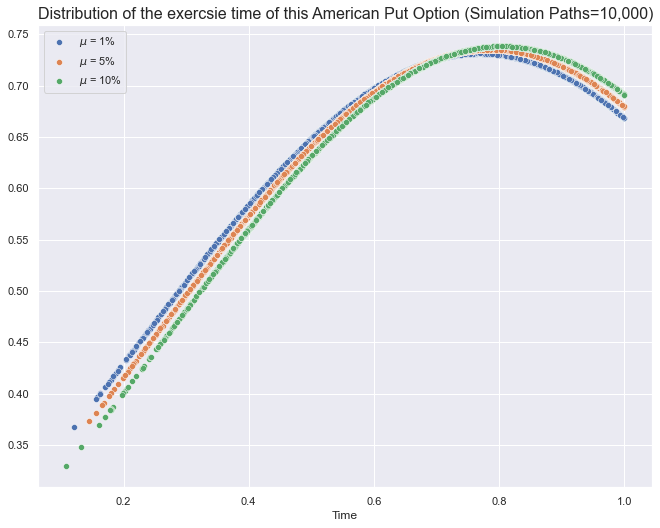

In [41]:
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
sns.scatterplot(early_exercise_time_mu1[:,0], np.exp(log_dens_mu1),label='$\mu$ = 1%');
sns.scatterplot(early_exercise_time[:,0], np.exp(log_dens1),label='$\mu$ = 5%');
sns.scatterplot(early_exercise_time_mu2[:,0], np.exp(log_dens_mu2),label='$\mu$ = 10%');
ax.set_xlabel("Time")
ax.set_title("Distribution of the exercsie time of this American Put Option (Simulation Paths=10,000)", fontsize=16);

**Impact of $\sigma$**

Second, try various values of $\sigma$, which equals to 10%, 20%, 30%

In [42]:
# try sigma = 10%

K = 10        # strike price
T = 1         # Time to expiration of the option
r = 0.02      # risk-free rate
mu = 0.05     # drift rate
sigma = 0.1   # volatility
N = 5000      # the number of discrete time values
S0 = 10       # starting stock price  
Nsims = 10000 # amount of simulated sample paths

log_dens_sig1, early_exercise_time_sig1 = exercise_time_kde(T,S0,mu,sigma,r,N,Nsims)

In [43]:
# try sigma = 30%

K = 10        # strike price
T = 1         # Time to expiration of the option
r = 0.02      # risk-free rate
mu = 0.05     # drift rate
sigma = 0.3   # volatility
N = 5000      # the number of discrete time values
S0 = 10       # starting stock price  
Nsims = 10000 # amount of simulated sample paths

log_dens_sig2, early_exercise_time_sig2 = exercise_time_kde(T,S0,mu,sigma,r,N,Nsims)

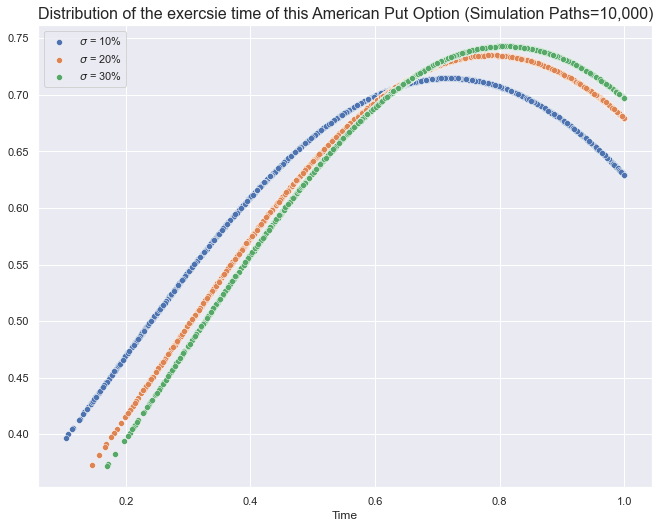

In [44]:
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
sns.scatterplot(early_exercise_time_sig1[:,0], np.exp(log_dens_sig1),label='$\sigma$ = 10%');
sns.scatterplot(early_exercise_time[:,0], np.exp(log_dens1),label='$\sigma$ = 20%');
sns.scatterplot(early_exercise_time_sig2[:,0], np.exp(log_dens_sig2),label='$\sigma$ = 30%');
ax.set_xlabel("Time")
ax.set_title("Distribution of the exercsie time of this American Put Option (Simulation Paths=10,000)", fontsize=16);

**Impact of $r$**

Third, try various value of $r$, which equals to 1%, 2% and 3%

In [45]:
# try r = 1%

K = 10        # strike price
T = 1         # Time to expiration of the option
r = 0.01      # risk-free rate
mu = 0.05     # drift rate
sigma = 0.2   # volatility
N = 5000      # the number of discrete time values
S0 = 10       # starting stock price  
Nsims = 10000 # amount of simulated sample paths

log_dens_r1, early_exercise_time_r1 = exercise_time_kde(T,S0,mu,sigma,r,N,Nsims)

In [46]:
# try r = 3%

K = 10        # strike price
T = 1         # Time to expiration of the option
r = 0.03      # risk-free rate
mu = 0.05     # drift rate
sigma = 0.2   # volatility
N = 5000      # the number of discrete time values
S0 = 10       # starting stock price  
Nsims = 10000 # amount of simulated sample paths

log_dens_r2, early_exercise_time_r2 = exercise_time_kde(T,S0,mu,sigma,r,N,Nsims)

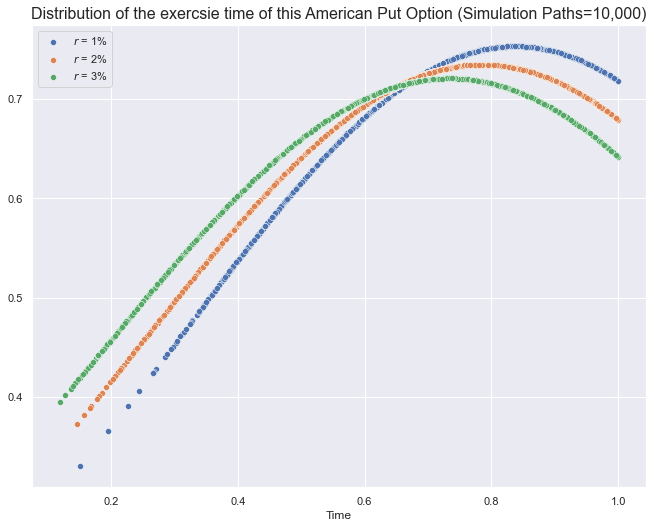

In [47]:
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
sns.scatterplot(early_exercise_time_r1[:,0], np.exp(log_dens_r1),label='$r$ = 1%');
sns.scatterplot(early_exercise_time[:,0], np.exp(log_dens1),label='$r$ = 2%');
sns.scatterplot(early_exercise_time_r2[:,0], np.exp(log_dens_r2),label='$r$ = 3%');
ax.set_xlabel("Time")
ax.set_title("Distribution of the exercsie time of this American Put Option (Simulation Paths=10,000)", fontsize=16);

#### 3.4.4 Parameters Impact on PnL distribution

In the following, I intend to investigate various parameters impact on the distribtuion of the PnL. Given the PnL needs the American Put option price as an input as well, I first need to establish a function to calculate the option price, using the binomial tree method.

In [48]:
def AMR_Put_Option_Price(T,S0,mu,sigma,r,N,Nsims):

    # delta of time step
    t = np.linspace(0,T,N)
    dt = t[1] - t[0]
    sqrt_dt = np.sqrt(dt)
    # up move increment
    u = np.exp(r*dt+sigma*sqrt_dt)
    # down move increment
    d = np.exp(r*dt-sigma*sqrt_dt)
    # probability of up move, the q measure 
    qu = (1-np.exp(-sigma*sqrt_dt))/(np.exp(sigma*sqrt_dt)-np.exp(-sigma*sqrt_dt))
    # probabiliy of down move, the q measure
    qd = 1 - qu

    # stock binomial tree
    StockTree = np.zeros((N+1,N+1))
    for j in range(N+1):
        for i in range(j+1):
            StockTree[i][j] = S0*(u**(j-i))*(d**(i))
  
    # American put option payoff binomial tree
    PayoffTree = np.zeros((N+1,N+1))
    for j in range(N+1):
        for i in range(j+1):
            PayoffTree[i][j] = np.maximum(0, K-StockTree[i][j])
  
    # discount the payoff tree backwards considering the early exercise option
    for j in range(N-1,-1,-1):
        for i in range(j+1):
            PayoffTree[i][j] = (qu*PayoffTree[i][j+1]+qd*PayoffTree[i+1][j+1])*np.exp(-r*dt)
            if (K-StockTree[i][j]) >= PayoffTree[i][j]:
                PayoffTree[i][j] = K - StockTree[i][j]

    optionprice = PayoffTree[0][0]

    return optionprice

In [50]:
def PnL_kde(T,S0,mu,sigma,r,N,Nsims):

    # simulate the price path and store the path in a Nsims by N matrix
    S_simulation = SimPrice(T,r,mu,sigma,N,S0,Nsims)

    # obtain the exercise boundary
    S, tau = exercise_boundary_amer_put(S0,T,mu,sigma,r,N)

    # obtain the exercise time
    exercise_time = np.zeros(Nsims)

    for j in range(Nsims):
        for i in range(len(tau)):
            time_step = int(tau[i]/dt)
            if S_simulation[j,time_step] <= S[i]:
                exercise_time[j] = time_step
  
    # PnL is a vector storing the PnL of this put option
    PnL = np.zeros(Nsims)
    # obtain the option price based on provided parameters
    optionprice = AMR_Put_Option_Price(T,S0,mu,sigma,r,N,Nsims)

    for j in range(Nsims):
        if exercise_time[j] != 0.:
            exercise_time_step = int(exercise_time[j])
            PnL[j] = np.max((K-S_simulation[j,exercise_time_step]),0)-optionprice

    # with the PnL array, use Gaussian kernel to obtain a kernel density estimate
    AMR_Put_PnL = PnL[PnL!=0]
    AMR_Put_PnL = AMR_Put_PnL.reshape((AMR_Put_PnL.shape[0],1))

    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(AMR_Put_PnL)
    log_dens = kde.score_samples(AMR_Put_PnL)

    return log_dens, AMR_Put_PnL

**Impact of $\mu$**

First, I try various values of $\mu$, which equals to 1%, 5%, 10%

In [51]:
# try mu rate = 1%

K = 10        # strike price
T = 1         # Time to expiration of the option
r = 0.02      # risk-free rate
mu = 0.01     # drift rate
sigma = 0.2   # volatility
N = 5000      # the number of discrete time values
S0 = 10       # starting stock price  
Nsims = 10000 # amount of simulated sample paths

log_dens_PnL_mu1, AMR_Put_PnL_mu1 = PnL_kde(T,S0,mu,sigma,r,N,Nsims)

In [52]:
# try mu rate = 10%

K = 10        # strike price
T = 1         # Time to expiration of the option
r = 0.02      # risk-free rate
mu = 0.1      # drift rate
sigma = 0.2   # volatility
N = 5000      # the number of discrete time values
S0 = 10       # starting stock price  
Nsims = 10000 # amount of simulated sample paths

log_dens_PnL_mu2, AMR_Put_PnL_mu2 = PnL_kde(T,S0,mu,sigma,r,N,Nsims)

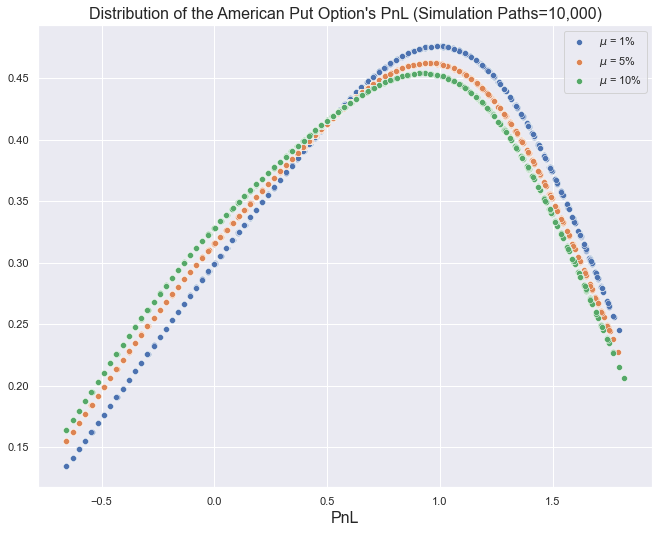

In [53]:
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
sns.scatterplot(AMR_Put_PnL_mu1[:,0], np.exp(log_dens_PnL_mu1),label='$\mu$ = 1%');
sns.scatterplot(AMR_Put_PnL[:,0], np.exp(log_dens7),label='$\mu$ = 5%');
sns.scatterplot(AMR_Put_PnL_mu2[:,0], np.exp(log_dens_PnL_mu2),label='$\mu$ = 10%');
ax.set_xlabel("PnL",fontsize=16)
ax.set_title("Distribution of the American Put Option's PnL (Simulation Paths=10,000)", fontsize=16);

**Imapct of $\sigma$**

Second, try various values of $\sigma$, which equals to 10%, 20%, 30%

In [54]:
# try sigma = 10%

K = 10        # strike price
T = 1         # Time to expiration of the option
r = 0.02      # risk-free rate
mu = 0.05     # drift rate
sigma = 0.1   # volatility
N = 5000      # the number of discrete time values
S0 = 10       # starting stock price  
Nsims = 10000 # amount of simulated sample paths

log_dens_PnL_sig1, AMR_Put_PnL_sig1 = PnL_kde(T,S0,mu,sigma,r,N,Nsims)

In [55]:
# try sigma = 30%

K = 10        # strike price
T = 1         # Time to expiration of the option
r = 0.02      # risk-free rate
mu = 0.05     # drift rate
sigma = 0.3   # volatility
N = 5000      # the number of discrete time values
S0 = 10       # starting stock price  
Nsims = 10000 # amount of simulated sample paths

log_dens_PnL_sig2, AMR_Put_PnL_sig2 = PnL_kde(T,S0,mu,sigma,r,N,Nsims)

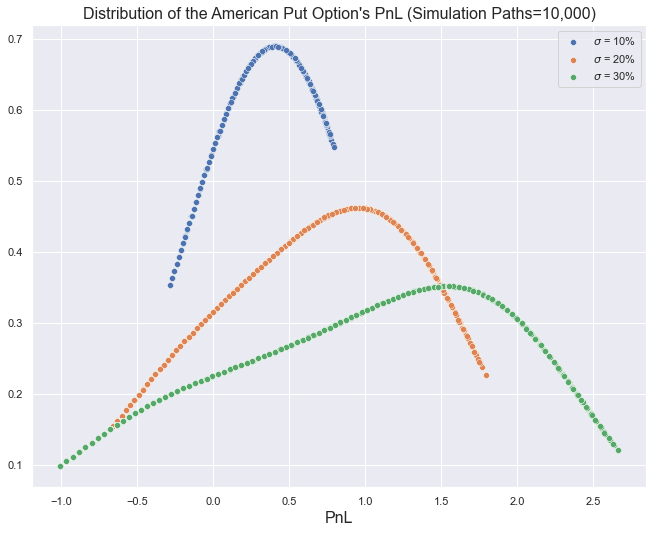

In [56]:
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
sns.scatterplot(AMR_Put_PnL_sig1[:,0], np.exp(log_dens_PnL_sig1),label='$\sigma$ = 10%');
sns.scatterplot(AMR_Put_PnL[:,0], np.exp(log_dens7),label='$\sigma$ = 20%');
sns.scatterplot(AMR_Put_PnL_sig2[:,0], np.exp(log_dens_PnL_sig2),label='$\sigma$ = 30%');
ax.set_xlabel("PnL",fontsize=16)
ax.set_title("Distribution of the American Put Option's PnL (Simulation Paths=10,000)", fontsize=16);

**Impact of $r$**

Third, try various value of $r$, which equals to 1%, 2% and 3%

In [57]:
# try r = 1%

K = 10        # strike price
T = 1         # Time to expiration of the option
r = 0.01      # risk-free rate
mu = 0.05     # drift rate
sigma = 0.2   # volatility
N = 5000      # the number of discrete time values
S0 = 10       # starting stock price  
Nsims = 10000 # amount of simulated sample paths

log_dens_PnL_r1, AMR_Put_PnL_r1 = PnL_kde(T,S0,mu,sigma,r,N,Nsims)

In [58]:
# try r = 3%

K = 10        # strike price
T = 1         # Time to expiration of the option
r = 0.03      # risk-free rate
mu = 0.05     # drift rate
sigma = 0.2   # volatility
N = 5000      # the number of discrete time values
S0 = 10       # starting stock price  
Nsims = 10000 # amount of simulated sample paths

log_dens_PnL_r2, AMR_Put_PnL_r2 = PnL_kde(T,S0,mu,sigma,r,N,Nsims)

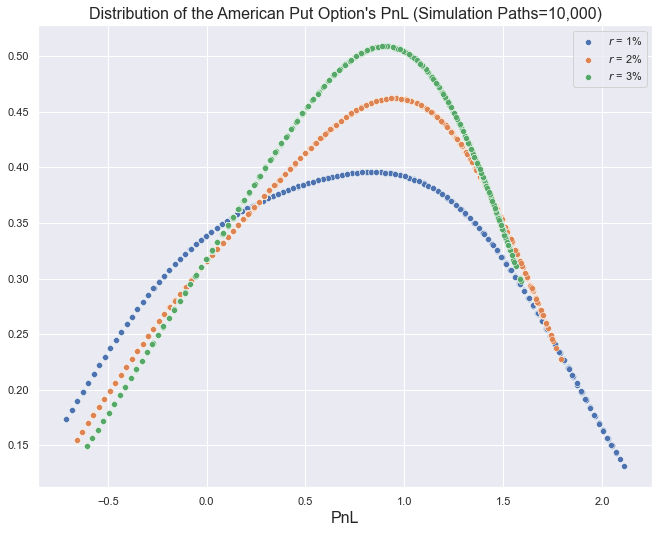

In [59]:
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
sns.scatterplot(AMR_Put_PnL_r1[:,0], np.exp(log_dens_PnL_r1),label='$r$ = 1%');
sns.scatterplot(AMR_Put_PnL[:,0], np.exp(log_dens7),label='$r$ = 2%');
sns.scatterplot(AMR_Put_PnL_r2[:,0], np.exp(log_dens_PnL_r2),label='$r$ = 3%');
ax.set_xlabel("PnL",fontsize=16)
ax.set_title("Distribution of the American Put Option's PnL (Simulation Paths=10,000)", fontsize=16);

## Question 3.(b)(ii)

Suppose we own the American put option with the base parameters, explore the distributions of PnL and exercise time given 5 different volatility values, which are 10%, 15%, 20%, 25%, 30%.

First, we need to retrieve the trading strategy's exercise boundary, which was calculated based on the base parameters and these results have been saved as S and tau arrays in this notebook.

Second, we need to simulate the price paths using different volatility values.

### $\sigma$ = 10% Price Path Simulation

In [ ]:
# try sigma = 10%

K = 10          # strike price
T = 1           # Time to expiration of the option
r = 0.02        # risk-free rate
mu = 0.05       # drift rate
sigma = 0.1     # volatility
N = 5000        # the number of discrete time values
S0 = 10         # starting stock price  
Nsims = 10_000  # number of simulation paths

S_simulation_sig1 = SimPrice(T,r,mu,sigma,N,S0,Nsims)

### $\sigma$ = 10% Exercise Time Calculation

In [ ]:
# S is the exercise boundary's stock price given base parameters
# tau is the exercise boundary's time index value given base parameters
# exercise_time_simulation_sig1 is the vector to store the exercise time for each simulated asset price path when sigma = 10%

exercise_time_simulation_sig1 = np.zeros(Nsims)

for j in range(Nsims):
  for i in range(len(tau)):
    time_step = int(tau[i]/dt)
    if S_simulation_sig1[j,time_step] <= S[i]:
      exercise_time_simulation_sig1[j] = time_step

early_exercise_time_simulation_sig1 = exercise_time_simulation_sig1[exercise_time_simulation_sig1!=0.]*dt
early_exercise_time_simulation_sig1 = early_exercise_time_simulation_sig1.reshape((early_exercise_time_simulation_sig1.shape[0],1))

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(early_exercise_time_simulation_sig1)
log_dens_simulation_sig1 = kde.score_samples(early_exercise_time_simulation_sig1)

To check whether the exercise time extracted was correct, I inspected on one simulation path

In [ ]:
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
sns.lineplot(x=t,y=S_simulation_sig1[50,:]);
sns.lineplot(x=tau,y=S);
ax.set_title("One Simulation Path with Exercise Boundary (base parameters)", fontsize=16);
print("Exercsie time extracted from the above code is: ",round(exercise_time_simulation_sig1[50]*dt,2))

### $\sigma$ = 10% PnL Calculation

In [ ]:
# PnL_simulation_sig1 is a vector storing the PnL of this put option
PnL_simulation_sig1 = np.zeros(Nsims)

for j in range(Nsims):
  if exercise_time_simulation_sig1[j] != 0.:
    exercise_time_step = int(exercise_time_simulation_sig1[j])
    PnL_simulation_sig1[j] = np.max((K-S_simulation_sig1[j,exercise_time_step]),0) - optionprice # optionprice is the American Put Option price based on the base parameters

# with the PnL array, use Gaussian kernel to obtain a kernel density estimate
AMR_Put_PnL_simulation_sig1 = PnL_simulation_sig1[PnL_simulation_sig1!=0]
AMR_Put_PnL_simulation_sig1 = AMR_Put_PnL_simulation_sig1.reshape((AMR_Put_PnL_simulation_sig1.shape[0],1))

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(AMR_Put_PnL_simulation_sig1)
log_dens_PnL_simulation_sig1 = kde.score_samples(AMR_Put_PnL_simulation_sig1)

### $\sigma$ = 15% Price Simulation

In [ ]:
# try sigma = 15%

K = 10          # strike price
T = 1           # Time to expiration of the option
r = 0.02        # risk-free rate
mu = 0.05       # drift rate
sigma = 0.15    # volatility
N = 5000        # the number of discrete time values
S0 = 10         # starting stock price  
Nsims = 10_000  # number of simulation paths

S_simulation_sig2 = SimPrice(T,r,mu,sigma,N,S0,Nsims)

### $\sigma$ = 15% Exercise Time Calculation

In [ ]:
# S is the exercise boundary's stock price given base parameters
# tau is the exercise boundary's time index value given base parameters
# exercise_time_simulation_sig2 is the vector to store the exercise time for each simulated asset price path when sigma = 15%

exercise_time_simulation_sig2 = np.zeros(Nsims)

for j in range(Nsims):
  for i in range(len(tau)):
    time_step = int(tau[i]/dt)
    if S_simulation_sig2[j,time_step] <= S[i]:
      exercise_time_simulation_sig2[j] = time_step

early_exercise_time_simulation_sig2 = exercise_time_simulation_sig2[exercise_time_simulation_sig2!=0.]*dt
early_exercise_time_simulation_sig2 = early_exercise_time_simulation_sig2.reshape((early_exercise_time_simulation_sig2.shape[0],1))

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(early_exercise_time_simulation_sig2)
log_dens_simulation_sig2 = kde.score_samples(early_exercise_time_simulation_sig2)

### $\sigma$ = 15% PnL Calculation

In [ ]:
# PnL_simulation_sig2 is a vector storing the PnL of this put option
PnL_simulation_sig2 = np.zeros(Nsims)

for j in range(Nsims):
  if exercise_time_simulation_sig2[j] != 0.:
    exercise_time_step = int(exercise_time_simulation_sig1[j])
    PnL_simulation_sig2[j] = np.max((K-S_simulation_sig2[j,exercise_time_step]),0) - optionprice # optionprice is the American Put Option price based on the base parameters

# with the PnL array, use Gaussian kernel to obtain a kernel density estimate
AMR_Put_PnL_simulation_sig2 = PnL_simulation_sig2[PnL_simulation_sig2!=0]
AMR_Put_PnL_simulation_sig2 = AMR_Put_PnL_simulation_sig2.reshape((AMR_Put_PnL_simulation_sig2.shape[0],1))

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(AMR_Put_PnL_simulation_sig2)
log_dens_PnL_simulation_sig2 = kde.score_samples(AMR_Put_PnL_simulation_sig2)

### $\sigma$ = 25% Price Simulation

In [ ]:
# try sigma = 25%

K = 10          # strike price
T = 1           # Time to expiration of the option
r = 0.02        # risk-free rate
mu = 0.05       # drift rate
sigma = 0.25    # volatility
N = 5000        # the number of discrete time values
S0 = 10         # starting stock price  
Nsims = 10_000  # number of simulation paths

S_simulation_sig3 = SimPrice(T,r,mu,sigma,N,S0,Nsims)

### $\sigma$ = 25% Exercise Time Calculation

In [ ]:
# S is the exercise boundary's stock price given base parameters
# tau is the exercise boundary's time index value given base parameters
# exercise_time_simulation_sig3 is the vector to store the exercise time for each simulated asset price path when sigma = 25%

exercise_time_simulation_sig3 = np.zeros(Nsims)

for j in range(Nsims):
  for i in range(len(tau)):
    time_step = int(tau[i]/dt)
    if S_simulation_sig3[j,time_step] <= S[i]:
      exercise_time_simulation_sig3[j] = time_step

early_exercise_time_simulation_sig3 = exercise_time_simulation_sig3[exercise_time_simulation_sig3!=0.]*dt
early_exercise_time_simulation_sig3 = early_exercise_time_simulation_sig3.reshape((early_exercise_time_simulation_sig3.shape[0],1))

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(early_exercise_time_simulation_sig3)
log_dens_simulation_sig3 = kde.score_samples(early_exercise_time_simulation_sig3)

### $\sigma$ = 25% PnL Calculation

In [ ]:
# PnL_simulation_sig3 is a vector storing the PnL of this put option
PnL_simulation_sig3 = np.zeros(Nsims)

for j in range(Nsims):
  if exercise_time_simulation_sig3[j] != 0.:
    exercise_time_step = int(exercise_time_simulation_sig3[j])
    PnL_simulation_sig3[j] = np.max((K-S_simulation_sig3[j,exercise_time_step]),0) - optionprice # optionprice is the American Put Option price based on the base parameters

# with the PnL array, use Gaussian kernel to obtain a kernel density estimate
AMR_Put_PnL_simulation_sig3 = PnL_simulation_sig3[PnL_simulation_sig3!=0]
AMR_Put_PnL_simulation_sig3 = AMR_Put_PnL_simulation_sig3.reshape((AMR_Put_PnL_simulation_sig3.shape[0],1))

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(AMR_Put_PnL_simulation_sig3)
log_dens_PnL_simulation_sig3 = kde.score_samples(AMR_Put_PnL_simulation_sig3)

### $\sigma$ = 30% Price Simulation

In [ ]:
# try sigma = 30%

K = 10          # strike price
T = 1           # Time to expiration of the option
r = 0.02        # risk-free rate
mu = 0.05       # drift rate
sigma = 0.30    # volatility
N = 5000        # the number of discrete time values
S0 = 10         # starting stock price  
Nsims = 10_000  # number of simulation paths

S_simulation_sig4 = SimPrice(T,r,mu,sigma,N,S0,Nsims)

### $\sigma$ = 30% Exercise Time Calculation

In [ ]:
# S is the exercise boundary's stock price given base parameters
# tau is the exercise boundary's time index value given base parameters
# exercise_time_simulation_sig4 is the vector to store the exercise time for each simulated asset price path when sigma = 30%

exercise_time_simulation_sig4 = np.zeros(Nsims)

for j in range(Nsims):
  for i in range(len(tau)):
    time_step = int(tau[i]/dt)
    if S_simulation_sig4[j,time_step] <= S[i]:
      exercise_time_simulation_sig4[j] = time_step

early_exercise_time_simulation_sig4 = exercise_time_simulation_sig4[exercise_time_simulation_sig3!=0.]*dt
early_exercise_time_simulation_sig4 = early_exercise_time_simulation_sig4.reshape((early_exercise_time_simulation_sig4.shape[0],1))

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(early_exercise_time_simulation_sig4)
log_dens_simulation_sig4 = kde.score_samples(early_exercise_time_simulation_sig4)

### $\sigma$ = 30% PnL Calculation

In [ ]:
# PnL_simulation_sig4 is a vector storing the PnL of this put option
PnL_simulation_sig4 = np.zeros(Nsims)

for j in range(Nsims):
  if exercise_time_simulation_sig4[j] != 0.:
    exercise_time_step = int(exercise_time_simulation_sig4[j])
    PnL_simulation_sig4[j] = np.max((K-S_simulation_sig4[j,exercise_time_step]),0) - optionprice # optionprice is the American Put Option price based on the base parameters

# with the PnL array, use Gaussian kernel to obtain a kernel density estimate
AMR_Put_PnL_simulation_sig4 = PnL_simulation_sig4[PnL_simulation_sig4!=0]
AMR_Put_PnL_simulation_sig4 = AMR_Put_PnL_simulation_sig4.reshape((AMR_Put_PnL_simulation_sig4.shape[0],1))

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(AMR_Put_PnL_simulation_sig4)
log_dens_PnL_simulation_sig4 = kde.score_samples(AMR_Put_PnL_simulation_sig4)

### Distribution of Exercise Time with 5 different volatility values

In [ ]:
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
sns.scatterplot(early_exercise_time_simulation_sig1[:,0], np.exp(log_dens_simulation_sig1),label='$\sigma$ = 10%');
sns.scatterplot(early_exercise_time_simulation_sig2[:,0], np.exp(log_dens_simulation_sig2),label='$\sigma$ = 15%');
sns.scatterplot(early_exercise_time[:,0], np.exp(log_dens1),label='$\sigma$ = 20%');
sns.scatterplot(early_exercise_time_simulation_sig3[:,0], np.exp(log_dens_simulation_sig3),label='$\sigma$ = 25%');
sns.scatterplot(early_exercise_time_simulation_sig4[:,0], np.exp(log_dens_simulation_sig4),label='$\sigma$ = 30%');
ax.set_xlabel("Time")
ax.set_title("Distribution of the exercsie time of this American Put Option (Simulation Paths=10,000)", fontsize=16);

### Distribution of PnL with 5 different volatility values

In [ ]:
sns.set();
fig, ax = plt.subplots(figsize=(11,8.5));
sns.scatterplot(AMR_Put_PnL_simulation_sig1[:,0], np.exp(log_dens_PnL_simulation_sig1),label='$\sigma$ = 10%');
sns.scatterplot(AMR_Put_PnL_simulation_sig2[:,0], np.exp(log_dens_PnL_simulation_sig2),label='$\sigma$ = 15%');
sns.scatterplot(AMR_Put_PnL[:,0], np.exp(log_dens7),label='$\sigma$ = 20%');
sns.scatterplot(AMR_Put_PnL_simulation_sig3[:,0], np.exp(log_dens_PnL_simulation_sig3),label='$\sigma$ = 25%');
sns.scatterplot(AMR_Put_PnL_simulation_sig4[:,0], np.exp(log_dens_PnL_simulation_sig4),label='$\sigma$ = 30%');
ax.set_xlabel("PnL",fontsize=16)
ax.set_title("Distribution of the American Put Option's PnL (Simulation Paths=10,000)", fontsize=16);

## Appendix: Second Method for American Option Price calculation

This method will save more space compared with brute force establishing a binomial tree.

In [ ]:
import numpy as np
import math

# Define Variables
T = 1
S_0 = 10
mu = 0.05
sigma = 0.2
r = 0.02
N = 5000
#dt = T / N
t = np.linspace(0,T,N)
dt = t[1] - t[0]
K = 10
# a)
def American_Option_Value(S_0,T,mu,sigma,r,N,K):
    if (N == 0):
        return max(K-S_0,0)
    # Risk-Neutral Probabilities
    #dt = T / N
    q = (1-math.e**(-sigma*(dt**(1/2))))/  \
        (math.e**(sigma*(dt**(1/2))) -math.e**(-sigma*(dt**(1/2))) )
    step = N
    # Initialize variables
    Intrinsic_Value = np.array([-999])
    Continuing_Value = np.array([-999])
    while step >= 0:
        
        if step == N:

            # epsilon to record the total number of up and down movement
            epsilon = np.arange(-step,step+1,2)
            S_tn = S_0 * math.e**(step*r*dt+sigma*(dt**(1/2))*epsilon)
            Intrinsic_Value = np.maximum(K - S_tn,0)
            Continuing_Value = 0
            V_tn = np.maximum(Intrinsic_Value,Continuing_Value)
        else:
            if step == 0:
                assert(len(V_tn) == 2)
            epsilon = np.arange(-step,step+1,2)
            S_tn = S_0 * math.e**(step*r*dt+sigma*(dt**(1/2))*epsilon)
            Intrinsic_Value = np.maximum(K - S_tn,0)
            size = len(V_tn)
            up = V_tn[1:size]
            down = V_tn[0:size-1]
            Continuing_Value = (up * q + down * (1-q))*math.e**(-r*dt)
            V_tn = np.maximum(Intrinsic_Value,Continuing_Value)
        step -= 1
    return V_tn[0]
    
American_Option_Value(S_0,T,mu,sigma,r,N,K)
